# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [8]:
import os
import keras
import itertools

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[128, 256, 512]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-3]
EPOCHS = 50
BATCH_SIZE = 256
OPTIMIZER = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]

#
#使用迴圈，建立不同 Learning rate 的模型並訓練
results = {}
for lr, opt in itertools.product(LEARNING_RATE, OPTIMIZER):

    keras.backend.clear_session() # 把舊的 Graph 清掉
    
    print("Experiment with LR = %.6f, Optimizer = %s" % (lr, str(opt)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = opt(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s-momemtum-%s" % (str(lr), str(opt))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.SGD'>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               33024     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 512)               131584    
_________________________________________________________________
output (Dense)               (None, 10)                5130      
Total params: 563,082
Trainable params: 563,082
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 sam

50000/50000 [==============================] - 6s 119us/step - loss: 0.8815 - accuracy: 0.6868 - val_loss: 1.6271 - val_accuracy: 0.4933
Epoch 49/50
50000/50000 [==============================] - 6s 114us/step - loss: 0.8573 - accuracy: 0.6942 - val_loss: 1.7294 - val_accuracy: 0.4585
Epoch 50/50
50000/50000 [==============================] - 5s 106us/step - loss: 0.8481 - accuracy: 0.6978 - val_loss: 1.7050 - val_accuracy: 0.4778
Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.RMSprop'>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               33024     
________

50000/50000 [==============================] - 6s 118us/step - loss: 2.3079 - accuracy: 0.0983 - val_loss: 2.3120 - val_accuracy: 0.1001
Epoch 46/50
50000/50000 [==============================] - 6s 129us/step - loss: 2.3079 - accuracy: 0.1017 - val_loss: 2.3069 - val_accuracy: 0.1001
Epoch 47/50
50000/50000 [==============================] - 6s 128us/step - loss: 2.3077 - accuracy: 0.1011 - val_loss: 2.3124 - val_accuracy: 0.1001
Epoch 48/50
50000/50000 [==============================] - 6s 124us/step - loss: 2.3080 - accuracy: 0.0992 - val_loss: 2.3084 - val_accuracy: 0.1002
Epoch 49/50
50000/50000 [==============================] - 6s 122us/step - loss: 2.3079 - accuracy: 0.1006 - val_loss: 2.3095 - val_accuracy: 0.1001
Epoch 50/50
50000/50000 [==============================] - 6s 116us/step - loss: 2.3077 - accuracy: 0.0984 - val_loss: 2.3161 - val_accuracy: 0.1001
Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.Adagrad'>
Model: "model_1"
_______________________

50000/50000 [==============================] - 5s 108us/step - loss: 2.3025 - accuracy: 0.0990 - val_loss: 2.3022 - val_accuracy: 0.1003
Epoch 43/50
50000/50000 [==============================] - 6s 110us/step - loss: 2.3025 - accuracy: 0.0980 - val_loss: 2.3022 - val_accuracy: 0.1003
Epoch 44/50
50000/50000 [==============================] - 6s 111us/step - loss: 2.3025 - accuracy: 0.0967 - val_loss: 2.3022 - val_accuracy: 0.1003
Epoch 45/50
50000/50000 [==============================] - 5s 110us/step - loss: 2.3025 - accuracy: 0.0979 - val_loss: 2.3022 - val_accuracy: 0.1003
Epoch 46/50
50000/50000 [==============================] - 6s 111us/step - loss: 2.3025 - accuracy: 0.0977 - val_loss: 2.3021 - val_accuracy: 0.1003
Epoch 47/50
50000/50000 [==============================] - 6s 115us/step - loss: 2.3025 - accuracy: 0.0990 - val_loss: 2.3022 - val_accuracy: 0.1003
Epoch 48/50
50000/50000 [==============================] - 6s 124us/step - loss: 2.3025 - accuracy: 0.0976 - val_loss:

50000/50000 [==============================] - 7s 145us/step - loss: 2.3076 - accuracy: 0.0983 - val_loss: 2.3055 - val_accuracy: 0.1000
Epoch 40/50
50000/50000 [==============================] - 7s 143us/step - loss: 2.3066 - accuracy: 0.1019 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 41/50
50000/50000 [==============================] - 7s 142us/step - loss: 2.3068 - accuracy: 0.0988 - val_loss: 2.3063 - val_accuracy: 0.1000
Epoch 42/50
50000/50000 [==============================] - 7s 135us/step - loss: 2.3070 - accuracy: 0.0990 - val_loss: 2.3101 - val_accuracy: 0.1000
Epoch 43/50
50000/50000 [==============================] - 7s 140us/step - loss: 2.3069 - accuracy: 0.0990 - val_loss: 2.3057 - val_accuracy: 0.1000
Epoch 44/50
50000/50000 [==============================] - 7s 139us/step - loss: 2.3074 - accuracy: 0.0995 - val_loss: 2.3047 - val_accuracy: 0.1000
Epoch 45/50
50000/50000 [==============================] - 7s 133us/step - loss: 2.3069 - accuracy: 0.1003 - val_loss:

50000/50000 [==============================] - 7s 142us/step - loss: 1.8320 - accuracy: 0.3566 - val_loss: 1.8298 - val_accuracy: 0.3613
Epoch 37/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.8270 - accuracy: 0.3580 - val_loss: 1.8249 - val_accuracy: 0.3588
Epoch 38/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.8223 - accuracy: 0.3571 - val_loss: 1.8204 - val_accuracy: 0.3612
Epoch 39/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.8179 - accuracy: 0.3601 - val_loss: 1.8163 - val_accuracy: 0.3634
Epoch 40/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.8132 - accuracy: 0.3627 - val_loss: 1.8121 - val_accuracy: 0.3661
Epoch 41/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.8089 - accuracy: 0.3639 - val_loss: 1.8068 - val_accuracy: 0.3674
Epoch 42/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.8046 - accuracy: 0.3656 - val_loss:

50000/50000 [==============================] - 8s 159us/step - loss: 0.9709 - accuracy: 0.6520 - val_loss: 1.6658 - val_accuracy: 0.4790
Epoch 34/50
50000/50000 [==============================] - 8s 156us/step - loss: 0.9504 - accuracy: 0.6595 - val_loss: 1.6786 - val_accuracy: 0.4732
Epoch 35/50
50000/50000 [==============================] - 8s 167us/step - loss: 0.9271 - accuracy: 0.6660 - val_loss: 1.7045 - val_accuracy: 0.4801
Epoch 36/50
50000/50000 [==============================] - 8s 151us/step - loss: 0.9136 - accuracy: 0.6714 - val_loss: 1.8957 - val_accuracy: 0.4462
Epoch 37/50
50000/50000 [==============================] - 7s 132us/step - loss: 0.8914 - accuracy: 0.6803 - val_loss: 1.7104 - val_accuracy: 0.4730
Epoch 38/50
50000/50000 [==============================] - 8s 153us/step - loss: 0.8728 - accuracy: 0.6855 - val_loss: 1.7601 - val_accuracy: 0.4720
Epoch 39/50
50000/50000 [==============================] - 7s 133us/step - loss: 0.8582 - accuracy: 0.6909 - val_loss:

50000/50000 [==============================] - 7s 133us/step - loss: 1.4198 - accuracy: 0.5003 - val_loss: 1.4755 - val_accuracy: 0.4750
Epoch 31/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.4148 - accuracy: 0.5029 - val_loss: 1.4695 - val_accuracy: 0.4800
Epoch 32/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.4109 - accuracy: 0.5023 - val_loss: 1.4764 - val_accuracy: 0.4767
Epoch 33/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.4067 - accuracy: 0.5051 - val_loss: 1.4559 - val_accuracy: 0.4853
Epoch 34/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.4027 - accuracy: 0.5063 - val_loss: 1.4604 - val_accuracy: 0.4802
Epoch 35/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.3991 - accuracy: 0.5072 - val_loss: 1.4604 - val_accuracy: 0.4827
Epoch 36/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.3950 - accuracy: 0.5088 - val_loss:

50000/50000 [==============================] - 7s 133us/step - loss: 0.8252 - accuracy: 0.7044 - val_loss: 1.5078 - val_accuracy: 0.5258
Epoch 28/50
50000/50000 [==============================] - 6s 125us/step - loss: 0.7994 - accuracy: 0.7147 - val_loss: 1.5952 - val_accuracy: 0.5043
Epoch 29/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.7696 - accuracy: 0.7250 - val_loss: 1.5762 - val_accuracy: 0.5140
Epoch 30/50
50000/50000 [==============================] - 6s 122us/step - loss: 0.7527 - accuracy: 0.7308 - val_loss: 1.5929 - val_accuracy: 0.5205
Epoch 31/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.7142 - accuracy: 0.7454 - val_loss: 1.6514 - val_accuracy: 0.5161
Epoch 32/50
50000/50000 [==============================] - 8s 155us/step - loss: 0.6855 - accuracy: 0.7540 - val_loss: 1.7148 - val_accuracy: 0.4979
Epoch 33/50
50000/50000 [==============================] - 7s 132us/step - loss: 0.6713 - accuracy: 0.7593 - val_loss:

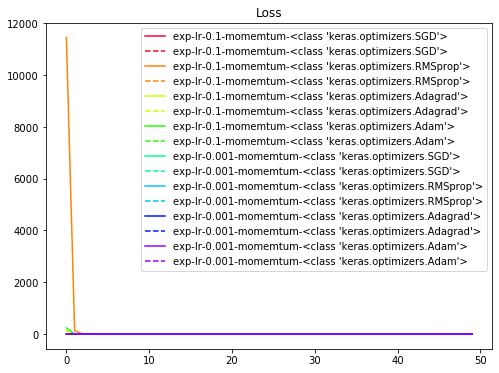

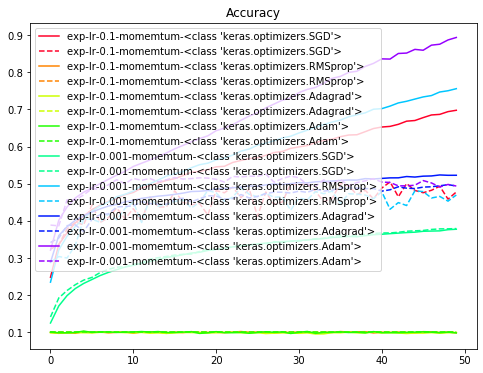

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()